In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime
import time

from sys import path
path.append(r'E:\data_mining\project\IJCAI-17-口碑\koubei')

import predict
import base
import shop_classify as sc

%load_ext autoreload
%autoreload 2

In [83]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve

In [3]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [40]:
#'learning_rate':[0.03, 0.05, 0.07], 
tuned_parameters = {'learning_rate' :[0.03, 0.05, 0.07],'n_estimators': [70, 100, 130], 'min_samples_split': [9, 12, 15], 'min_samples_leaf': [3, 7, 10], 'max_depth': [3,4,5]}


rf = GradientBoostingRegressor(random_state=0)

clf = GridSearchCV(rf, tuned_parameters, cv=4)
clf.fit(X_train_w1, y_train_w1)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

y_true, y_pred = y_validation_w1, clf.predict(X_validation_w1)
print(classification_report(y_true, y_pred))
print()

Best parameters set found on development set:

{'min_samples_leaf': 3, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 130, 'min_samples_split': 9}

Grid scores on development set:

0.868 (+/-0.069) for {'min_samples_leaf': 3, 'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 70, 'min_samples_split': 9}
0.879 (+/-0.060) for {'min_samples_leaf': 3, 'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 100, 'min_samples_split': 9}
0.883 (+/-0.057) for {'min_samples_leaf': 3, 'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 130, 'min_samples_split': 9}
0.868 (+/-0.069) for {'min_samples_leaf': 3, 'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 70, 'min_samples_split': 12}
0.879 (+/-0.060) for {'min_samples_leaf': 3, 'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 100, 'min_samples_split': 12}
0.883 (+/-0.056) for {'min_samples_leaf': 3, 'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 130, 'min_samples_split': 12}
0.868 (+/-0.069) for {'min_samples_l

NameError: name 'y_test' is not defined

In [160]:
#读取训练集
X_train_w1_df = pd.read_csv("../data/train/gbdt/X_train_w1.txt", sep='\t', index_col=0, encoding='UTF-8')
y_train_w1_df = pd.read_csv("../data/train/gbdt/y_train_w1.txt", sep='\t', header = None, index_col=0, encoding='UTF-8')

In [161]:
#WEEK_1_TRAIN

In [175]:
# Split the dataset in two equal parts
X_train_w1, X_validation_w1, y_train_w1, y_validation_w1 = train_test_split(X_train_w1_df.values, y_train_w1_df[2].values, random_state=7, test_size=0.5)  

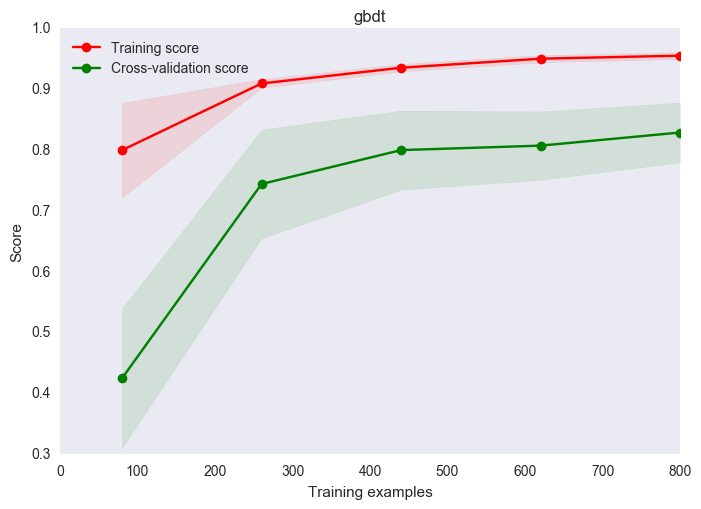

In [180]:
#random_state=0, min_samples_split=40, max_depth=4, learning_rate=0.05, min_samples_leaf=4, n_estimators=450
#'min_samples_leaf': 3, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 130, 'min_samples_split': 9
learning_gbdt_w1 = GradientBoostingRegressor(learning_rate = 0.03, random_state=0, min_samples_split=30, max_depth=3, min_samples_leaf=8, n_estimators=150)
plot_learning_curve(learning_gbdt_w1, 'gbdt', X_train_w1, y_train_w1, cv=5)
plt.show()

In [176]:
learning_gbdt_w1.fit(X_train_w1, y_train_w1)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.03, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=8, min_samples_split=30,
             min_weight_fraction_leaf=0.0, n_estimators=200,
             presort='auto', random_state=0, subsample=1.0, verbose=0,
             warm_start=False)

In [177]:
learning_gbdt_w1.score(X_validation_w1, y_validation_w1)

0.89227875682752911

In [178]:
y_predict_w1 = learning_gbdt_w1.predict(X_validation_w1).astype(np.int)

In [179]:
base.evaluation(y_predict_w1, y_validation_w1)

0.090164954608842079

In [159]:
pd.DataFrame(learning_gbdt_w1.feature_importances_).sort_values(0).tail(30)

,0
47,0.000000
48,0.000000
38,0.000000
49,0.000000
50,0.000000
20,0.000000
21,0.002132
12,0.003175
4,0.003500
14,0.004202


In [147]:
#WEEK_2_TRAIN

In [148]:
X_train_w2_df = pd.read_csv("../data/train/gbdt/X_train_w2.txt", sep='\t', index_col=0, encoding='UTF-8')
y_train_w2_df = pd.read_csv("../data/train/gbdt/y_train_w2.txt", sep='\t', header = None, index_col=0, encoding='UTF-8')

In [149]:
# Split the dataset in two equal parts
X_train_w2, X_validation_w2, y_train_w2, y_validation_w2 = train_test_split(X_train_w2_df.values, y_train_w2_df[1].values, random_state=0, test_size=0.5)  

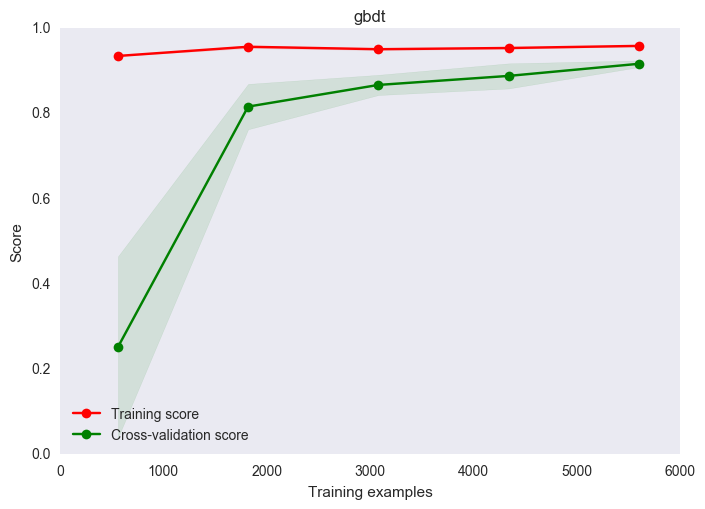

In [170]:
learning_gbdt_w2 = GradientBoostingRegressor(random_state=0, min_samples_split=70, max_depth=3, learning_rate=0.05, min_samples_leaf=25, n_estimators=1200)
plot_learning_curve(learning_gbdt_w2, 'gbdt', X_train_w2, y_train_w2, cv=5)
plt.show()

In [173]:
learning_gbdt_w2.fit(X_train_w2, y_train_w2)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=25, min_samples_split=70,
             min_weight_fraction_leaf=0.0, n_estimators=1200,
             presort='auto', random_state=0, subsample=1.0, verbose=0,
             warm_start=False)

In [178]:
learning_gbdt_w2.score(X_validation_w2, y_validation_w2)

0.91477489286067581

In [179]:
y_predict_w2 = learning_gbdt_w2.predict(X_validation_w2).astype(np.int)

In [180]:
base.evaluation(y_predict_w2, y_validation_w2)

0.08155864694126172

In [181]:
pd.DataFrame(learning_gbdt_w2.feature_importances_).sort_values(0).tail(30)

,0
29,0.003082
28,0.003102
26,0.003383
22,0.003411
79,0.004697
6,0.009307
23,0.010316
10,0.010369
12,0.010591
25,0.011364


In [182]:
###Predict

In [183]:
#读取测试集
X_test_w1_df = pd.read_csv("../data/predict/gbdt/X_predict_w1.txt", sep='\t', index_col=0, encoding='UTF-8')
X_test_w2_df = pd.read_csv("../data/predict/gbdt/X_predict_w2.txt", sep='\t', index_col=0, encoding='UTF-8')

In [184]:
X_test_w1_df.shape

(14000, 104)

In [185]:
# X_test_w1_df = min_max_scaler.fit_transform(X_test_w1_df)
# X_test_w2_df = min_max_scaler.fit_transform(X_test_w2_df)

In [186]:
y_predict_w1 = learning_gbdt_w1.predict(X_test_w1_df)

In [187]:
y_predict_w2 = learning_gbdt_w1.predict(X_test_w2_df)

In [188]:
np.concatenate((y_predict_w1.reshape((2000, 7)), y_predict_w2.reshape((2000, 7))), axis=1)

array([[ 196.81219784,  197.24897066,  197.24897066, ...,  228.50091675,
         274.59473764,  204.84188278],
       [  71.06326987,   71.61160987,   71.61160987, ...,   96.14104646,
         112.84242656,   74.30336029],
       [  62.46565595,   62.55465253,   62.55465253, ...,  101.39418856,
         106.17003622,   66.76032574],
       ..., 
       [ 558.93573591,  552.74226345,  545.07419716, ...,  372.67108453,
         352.15099936,  579.80155857],
       [ 284.08570406,  288.43822799,  288.43822799, ...,  209.08183015,
         448.03536773,  302.91285217],
       [ 166.01437473,  161.61633002,  161.10512295, ...,   66.86679908,
          66.96467264,  168.76043376]])

In [189]:
all_predict_df = pd.DataFrame(np.concatenate((y_predict_w1.reshape((2000, 7)), y_predict_w2.reshape((2000, 7))), axis=1))

In [190]:
all_predict_df = all_predict_df.set_index(np.array(range(1, 2001)))

In [191]:
import predict

In [192]:
all_predict_df = predict.FixFinalPredict(all_predict_df)

In [193]:
all_predict_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
1,196,197,197,237,228,274,204,196,197,197,237,228,274,204
2,71,71,71,81,96,112,74,71,71,71,81,96,112,74
3,62,62,62,97,101,106,66,62,62,62,97,101,106,66
4,93,96,96,111,217,205,100,93,96,96,111,217,205,100
5,184,184,185,230,197,289,193,184,184,185,230,197,289,193
6,97,97,97,124,105,114,102,97,97,97,124,105,114,102
7,103,104,104,126,160,182,108,103,104,104,126,160,182,108
8,56,56,56,45,67,75,59,56,56,56,45,67,75,59
9,216,221,221,203,267,295,229,216,221,221,203,267,295,229
10,98,98,98,87,97,101,102,98,98,98,87,97,101,102


In [169]:
all_predict_df.to_csv("../data/predict/gbdt/predict_3_1_night_1200.csv", index=True, header=None, encoding='UTF-8')